# PROXIMO ENCONTRO DOM 11h



? Reservar dados para validação ?
com o seed: 70,20,10 (treino / teste / validação)
Vermelho&Branco separado e depois une os dados.
Reserva a validação. (Quintella)



* EDA
* * -Tabela do describe
* * -comparações branco x tinto
* * * -Historgrama percentual
* * * -Outros?
* * -comparações com hue: (bom  x ruim)
* * -Heatmap Geral correlações
* *  -Heatmap chique da samya!
* * 
* * -Box plots das correlações mais significativas
* *  Pairplot das mais significativas


* Modelo linear
* * Métricas de avaliação ? 
* * * gráfico/visual: Histograma residuos, qqplot,
* * * por enquanto numérico: só R²
* * * depois numérico: R²_ajustado, maxima verossemelhança, AIC, AIR.
* * * ? ACHAR ALGO QUE FAÇA MAIS SENTIDO? algo válido para modelar inteiros ?
* * * 
* * * 
*
* Modelo Logistico
*
* 
* 

* integrantes do grupo (foto!)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
uci_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
red_df_raw= pd.read_csv(uci_url + 'winequality-red.csv', sep =';')
white_df_raw = pd.read_csv(uci_url + 'winequality-white.csv', sep =';')

**Train Dataset:** Set of data used for learning (by the model), that is, to fit the parameters to the machine learning model

**Valid Dataset:** 
Set of data used to provide an unbiased evaluation of a model fitted on the training dataset while tuning model hyperparameters. 
Also play a role in other forms of model preparation, such as feature selection, threshold cut-off selection.

**Test Dataset:**
Set of data used to provide an unbiased evaluation of a final model fitted on the training dataset.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data in 70:20:10 for train:valid:test dataset
train_size = 0.7
valid_size = 0.2
test_size = 0.1


X_red = red_df_raw.iloc[:,:-1 ].values
y_red = red_df_raw.loc[:, ['quality']].values
X_white = white_df_raw.iloc[:,:-1 ].values
y_white = white_df_raw.loc[:, ['quality']].values

# In the first step we will split the data in test and remaining dataset
X_red_rem, X_red_test, y_red_rem, y_red_test = train_test_split(X_red,y_red, test_size=test_size, random_state=42)
X_white_rem, X_white_test, y_white_rem, y_white_test = train_test_split(X_white,y_white, test_size=test_size, random_state=42)

# Agrupando dados para retornar à configuração inicial
red_df = pd.concat([pd.DataFrame(X_red_rem), pd.DataFrame(y_red_rem)], axis=1)
red_df.columns = red_df_raw.columns
white_df = pd.concat([pd.DataFrame(X_white_rem), pd.DataFrame(y_white_rem)], axis=1)
white_df.columns = white_df_raw.columns

red_df_test = pd.concat([pd.DataFrame(X_red_test), pd.DataFrame(y_red_test)], axis=1)
red_df_test.columns = red_df_raw.columns
white_df_test = pd.concat([pd.DataFrame(X_white_test), pd.DataFrame(y_white_test)], axis=1)
white_df_test.columns = white_df_raw.columns


In [ ]:
white_df['type'] = 'white'
red_df['type'] = 'red'
df_raw = pd.concat([white_df, red_df])
df_raw = df_raw.reset_index()
df_raw['ID'] =  df_raw['type'] + '_' + df_raw['index'].astype(str)  
df_raw = df_raw.drop('index', 1)
df_raw['is_good'] = df_raw['quality'].apply(lambda x : 0 if x <= 5 else 1)
df_raw['is_good']
df_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,ID,is_good
0,7.6,0.290,0.42,1.3,0.035,18.0,86.0,0.99080,2.99,0.39,11.3,5,white,white_0,0
1,6.4,0.380,0.24,7.2,0.047,41.0,151.0,0.99604,3.11,0.60,9.2,5,white,white_1,0
2,7.5,0.320,0.49,1.7,0.031,44.0,109.0,0.99060,3.07,0.46,12.5,6,white,white_2,1
3,6.5,0.260,0.43,8.9,0.083,50.0,171.0,0.99650,2.85,0.50,9.0,5,white,white_3,0
4,6.0,0.140,0.37,1.2,0.032,63.0,148.0,0.99185,3.32,0.44,11.2,5,white,white_4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4,6,red,red_1434,1
5843,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,6,red,red_1435,1
5844,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5,red,red_1436,0
5845,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9,7,red,red_1437,1


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5847 non-null   float64
 1   volatile acidity      5847 non-null   float64
 2   citric acid           5847 non-null   float64
 3   residual sugar        5847 non-null   float64
 4   chlorides             5847 non-null   float64
 5   free sulfur dioxide   5847 non-null   float64
 6   total sulfur dioxide  5847 non-null   float64
 7   density               5847 non-null   float64
 8   pH                    5847 non-null   float64
 9   sulphates             5847 non-null   float64
 10  alcohol               5847 non-null   float64
 11  quality               5847 non-null   int64  
 12  type                  5847 non-null   object 
 13  ID                    5847 non-null   object 
 14  is_good               5847 non-null   int64  
dtypes: float64(11), int64

In [ ]:
df_raw.describe().loc[['min','max','mean', 'std']].round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_good
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00,0.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00,1.00
mean,7.22,0.34,0.32,5.46,0.06,30.58,115.69,0.99,3.22,0.53,10.49,5.82,0.63
std,1.30,0.17,0.15,4.78,0.04,17.78,56.19,0.00,0.16,0.15,1.19,0.87,0.48


In [ ]:
cores = {type: "darkred" if type == "red" else "palegoldenrod" for type in df_raw.type.unique()}

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

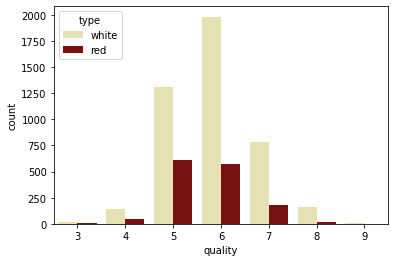

In [ ]:
sns.countplot(df_raw['quality'], hue=df_raw['type'], palette = cores)

<AxesSubplot:xlabel='quality', ylabel='perc'>

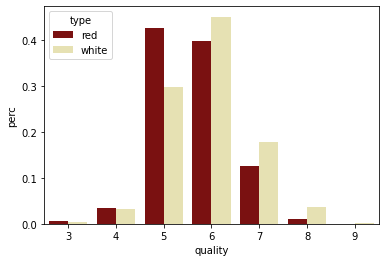

In [ ]:
df_perc =(df_raw.groupby('type')['quality'].value_counts(normalize=True).rename('perc').reset_index())
sns.barplot(x="quality", y='perc', hue='type', data=df_perc, palette = cores)


#### Análise de correlações  

Text(0.5, 0.98, 'Correlações entre variáveis - Wine dataset\n Branco e Tinto')

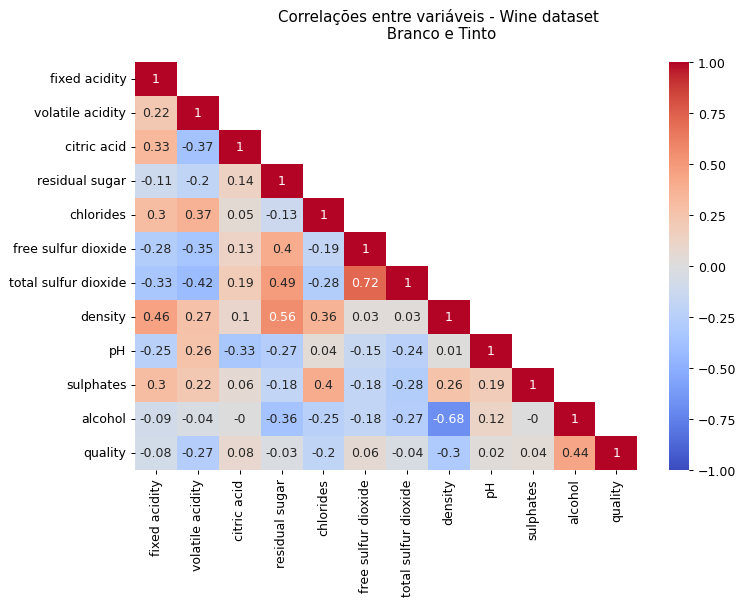

In [ ]:
mask = np.zeros_like(df_raw.iloc[:, :12].corr())
mask[np.triu_indices_from(mask, k = 1)] = True

plt.figure(figsize=(9, 6), dpi= 90)
g = sns.heatmap(df_raw.iloc[:, :12].corr().round(2),
                annot=True, center=0, vmin=-1, vmax=1,
                cmap = "coolwarm", mask = mask)
plt.suptitle('Correlações entre variáveis - Wine dataset\n Branco e Tinto')

Text(0.5, 0.98, 'Correlações entre variáveis - Wine dataset\n Branco (triângulo inferior) X Tinto (triângulo superior)')

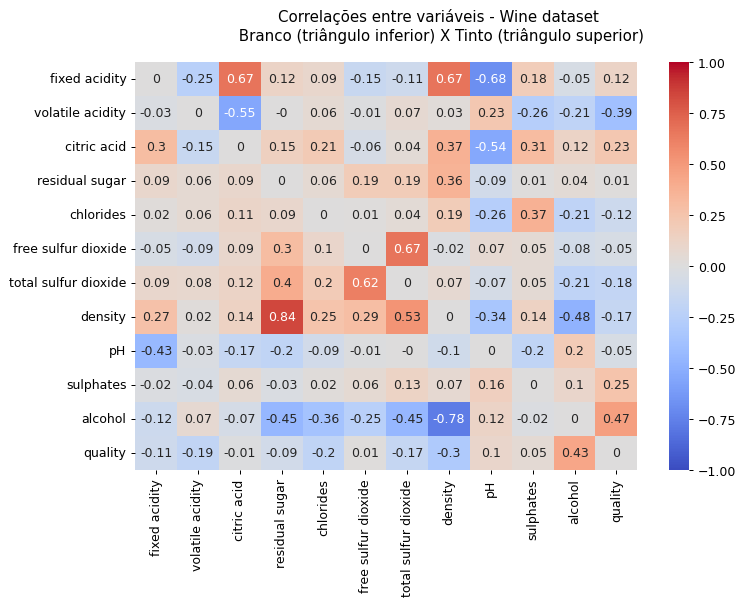

In [ ]:
#HEATMAP chic (dá pra melhorar)
colunas = df_raw.columns[:12]
## correlações por grupo
red_corr = df_raw[df_raw['type']=='red'].iloc[:, :12].corr()
red_corr = pd.DataFrame(np.triu(red_corr,k=1)) #red no upper triangle

white_corr = df_raw[df_raw['type']=='white'].iloc[:, :12].corr()
white_corr = pd.DataFrame(np.tril(white_corr,k=-1)) #white no lower triangle

## matriz correlações combinadas
combined_corr = red_corr + white_corr
combined_corr.columns = colunas
combined_corr = combined_corr.set_index(colunas)

## plots
plt.figure(figsize=(9, 6), dpi= 90)
g = sns.heatmap(combined_corr.round(2),
                annot=True, center=0, vmin=-1, vmax=1,
                cmap = "coolwarm")
plt.suptitle('Correlações entre variáveis - Wine dataset\n Branco (triângulo inferior) X Tinto (triângulo superior)')



In [ ]:
# escolha de variáveis (corr >= 0.2)
strong_vars = ['alcohol', 'density', 'volatile acidity']
slcted_vars = ['alcohol', 'density', 'volatile acidity', 'quality', 'type']

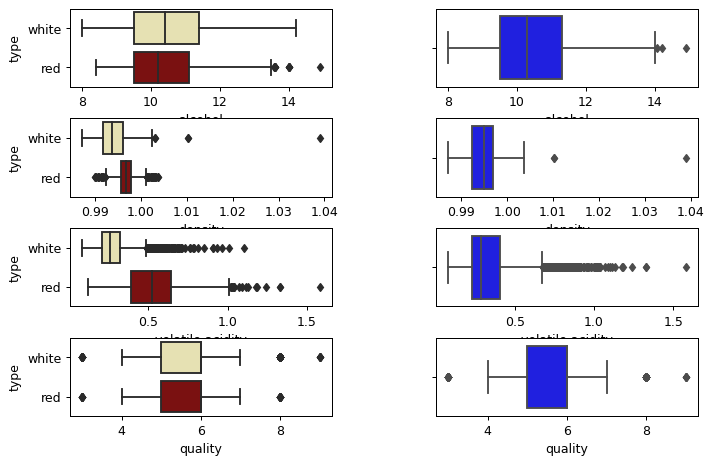

In [ ]:
# boxplots
fig = plt.figure(figsize=(9, 6), dpi= 90)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0,4):
    ax = fig.add_subplot(4, 2, i*2+1)
    sns.boxplot(x=slcted_vars[i], y='type', data=df_raw, ax = ax, palette = cores)
    ax = fig.add_subplot(4, 2, i*2+2)
    sns.boxplot(x=slcted_vars[i], data=df_raw, ax = ax, color = 'blue')

[(6.0, 14.0)]

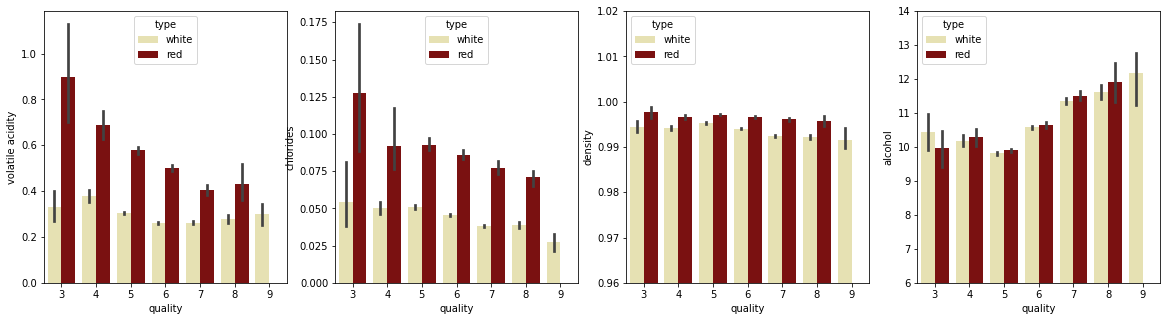

In [ ]:
f, axes = plt.subplots(1, 4)
f.set_figheight(5)
f.set_figwidth(20)
sns.barplot(x='quality', y='volatile acidity', data=df_raw, hue='type' , ax=axes[0],  palette = cores)
sns.barplot(x='quality', y='chlorides', data=df_raw, hue='type' , ax=axes[1],  palette = cores)
sns.barplot(x='quality', y='density', data=df_raw, hue='type' , ax=axes[2],  palette = cores)
axes[2].set(ylim=(0.96,1.02))
sns.barplot(x='quality', y='alcohol', data=df_raw, hue='type' , ax=axes[3],  palette = cores)
axes[3].set(ylim=(6,14))

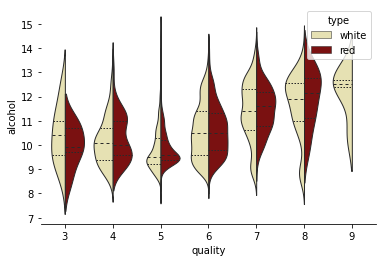

In [ ]:

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df_raw, x="quality", y="alcohol", hue="type",
               split=True, inner="quart", linewidth=1,  palette = cores)
sns.despine(left=True)

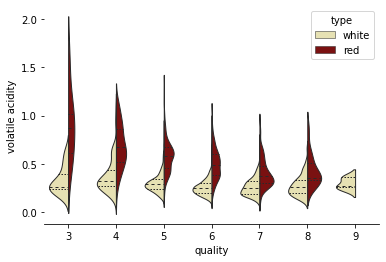

In [ ]:
sns.violinplot(data=df_raw, x="quality", y="volatile acidity", hue="type",
               split=True, inner="quart", linewidth=1,  palette = cores)
sns.despine(left=True)
	# Essencial para o vinho branco, pois não esta correlacionado com o alcool.
  # Para o vinho tinto, poode servir para diferenciar os vinhos com notas muito baixas 3 e 4.
  # Pois é linear para a volatilidade de acidez, e possui concavidade no alcool. 
  # Utilidade não capturada por modelos lineares.

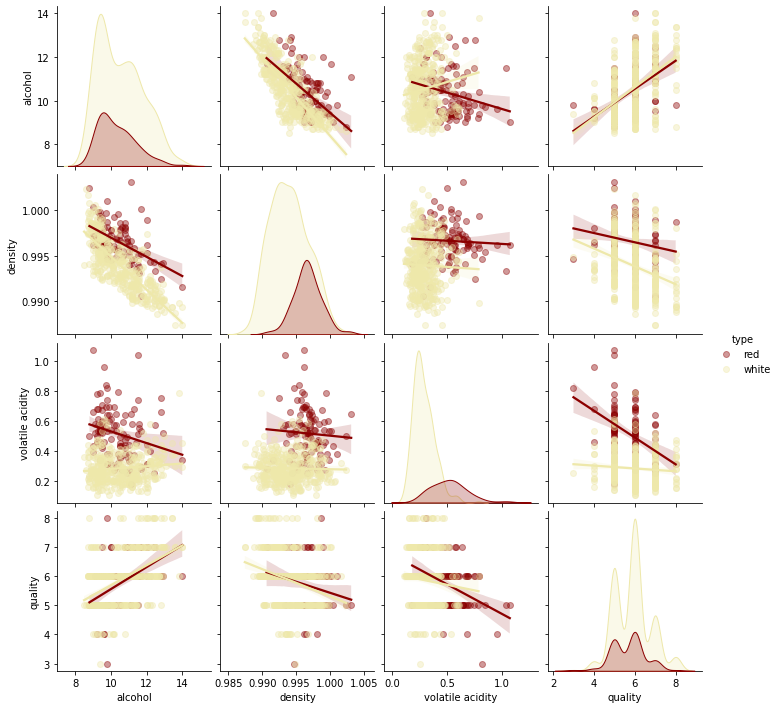

In [ ]:
# pairplot
sns.pairplot(df_raw[slcted_vars].sample(500), hue='type', palette = cores, kind='reg', plot_kws={'scatter_kws': {'alpha': 0.4}})

# Rascunhos ↓

### Vamos criar nossas regressões

- Carregar sklearn
- Separar matriz de variáveis preditoras 
- Separar amostras treino e teste



In [ ]:
# Importing the dataset
X = df_raw.loc[:, ['alcohol', 'density', 'volatile acidity']].values
y = df_raw.loc[:, ['quality']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
# Instancia o modelo
linreg = LinearRegression()
# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
linreg.fit(X_train, y_train)
# Para os dados novos, vamos definir a predição para a base de teste
y_pred = linreg.predict(X_test)
y_pred_round = y_pred.round()

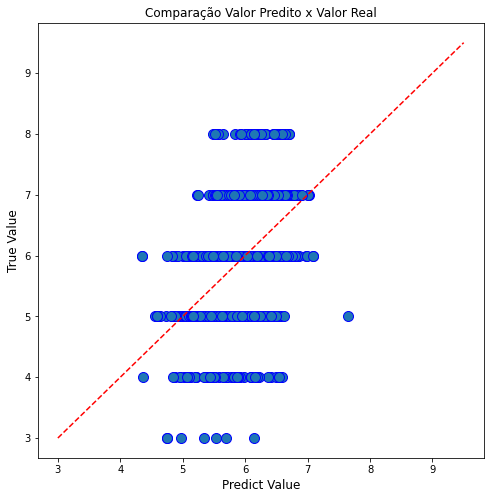

In [ ]:
# Vamos criar um gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo', alpha=0.1)
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show()

In [ ]:
from sklearn import metrics

print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred, squared=False))

In [ ]:
# Importing the dataset
X = df_raw.loc[:, strong_vars].values
y = df_raw.loc[:, ['quality']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

from sklearn.linear_model import LinearRegression

# testando modelos com strong variables sozinhas
for i in range(0,3):
# Instancia o modelo
    linreg = LinearRegression()
    # Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
    linreg.fit(X_train[:,i].reshape(-1, 1), y_train)
    # Para os dados novos, vamos definir a predição para a base de teste
    y_pred = linreg.predict(X_test[:,i].reshape(-1, 1))
    y_pred_round = y_pred.round()

    #metrics
    from sklearn import metrics
    print('only ' + strong_vars[i])

    print('R² = ' + str(metrics.r2_score(y_test, y_pred).round(4)))
    print('RMSE = ' + str(metrics.mean_squared_error(y_test, y_pred, squared=False).round(4)))
    R2adjst = 1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
    print('R²adj = ' + str(R2adjst.round(4)) + '\n')

# Instancia o modelo
linreg = LinearRegression()
# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
linreg.fit(X_train, y_train)
# Para os dados novos, vamos definir a predição para a base de teste
y_pred = linreg.predict(X_test)
y_pred_round = y_pred.round()

#metrics
from sklearn import metrics
print('all strong variables')

print('R² = ' + str(metrics.r2_score(y_test, y_pred).round(4)))
print('RMSE = ' + str(metrics.mean_squared_error(y_test, y_pred, squared=False).round(4)))

R2adjst = 1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
print('R²adj = ' + str(R2adjst.round(4)))

only alcohol
R² = 0.1759
RMSE = 0.7976
R²adj = 0.1745

only density
R² = 0.0677
RMSE = 0.8483
R²adj = 0.0661

only volatile acidity
R² = 0.0656
RMSE = 0.8493
R²adj = 0.064

all strong variables
R² = 0.2491
RMSE = 0.7613
R²adj = 0.2478


In [ ]:
# Importing the dataset
X = df_raw.loc[:, ['alcohol', 'density', 'volatile acidity']].values
y = df_raw.loc[:, ['quality']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=288731e9-11dd-4244-b549-4e62c747510d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>